# Analysis By Jayesh

# <b> <u>Problem Statement</u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.

**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# <b> <u>Variable Description</u></b>

**Demographic:**
*  **Sex**: male or female("M" or "F")

*  **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**
* **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) -DV



---



**Importing Required Libraries**

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

## **Reading the Data**

In [46]:
# loading the csv data to a Pandas DataFrame
#df = pd.read_csv(r"C:\Users\sharm\Downloads\Cadiovasculer Risk Prediction\test.csv")
df = pd.read_csv(r"C:\Users\sharm\Downloads\Cadiovasculer Risk Prediction\CHD_preprocessed.csv")

In [6]:
# print first 5 rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [7]:
# print last 5 rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
843,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
844,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
845,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN
846,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0
847,4237,56,NaN,M,YES,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.0


In [8]:
# number of rows and columns in the dataset
df.shape

(848, 16)

In [9]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


## **Data Preprocessing and Basic EDA**

We drop the education and id columns because it has no correlation with heart disease.

In [9]:
# Removing columns such as 'id' & 'education' 
df.drop(['id','education'],axis=1,inplace=True)

In [10]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,56,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,58,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,47,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,44,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


 Before we go ahead, an important step to do is to convert our string feature  into an integer.
 
  We will name 

*   In **sex** feature  **M** will be converted to 1 and **F** will be converted to 0.
*   In **is_smoking** feature  **YES** will be converted to 1 and **NO** will be converted to 0.


In [11]:
# Applying function to convert string data to an integer
df['sex'] = df['sex'].apply(lambda x : 1 if x == "M" else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x : 1 if x == "YES" else 0)

In [43]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [12]:
# checking the distribution
df['sex'].value_counts()

0    496
1    352
Name: sex, dtype: int64

In [13]:
# checking the distribution
df['is_smoking'].value_counts()

0    441
1    407
Name: is_smoking, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              848 non-null    int64  
 1   sex              848 non-null    int64  
 2   is_smoking       848 non-null    int64  
 3   cigsPerDay       841 non-null    float64
 4   BPMeds           839 non-null    float64
 5   prevalentStroke  848 non-null    int64  
 6   prevalentHyp     848 non-null    int64  
 7   diabetes         848 non-null    int64  
 8   totChol          836 non-null    float64
 9   sysBP            848 non-null    float64
 10  diaBP            848 non-null    float64
 11  BMI              843 non-null    float64
 12  heartRate        848 non-null    float64
 13  glucose          764 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 92.9 KB


In [15]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,1,1,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,56,0,0,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,58,0,1,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,47,0,0,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,44,1,0,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


**Missing Value Analysis** 

 Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [16]:
# checking for missing values
df.isnull().sum()

age                 0
sex                 0
is_smoking          0
cigsPerDay          7
BPMeds              9
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 5
heartRate           0
glucose            84
dtype: int64

 The next single-line code will visualize the location of missing values.

<Axes: title={'center': 'Places of missing values in column'}>

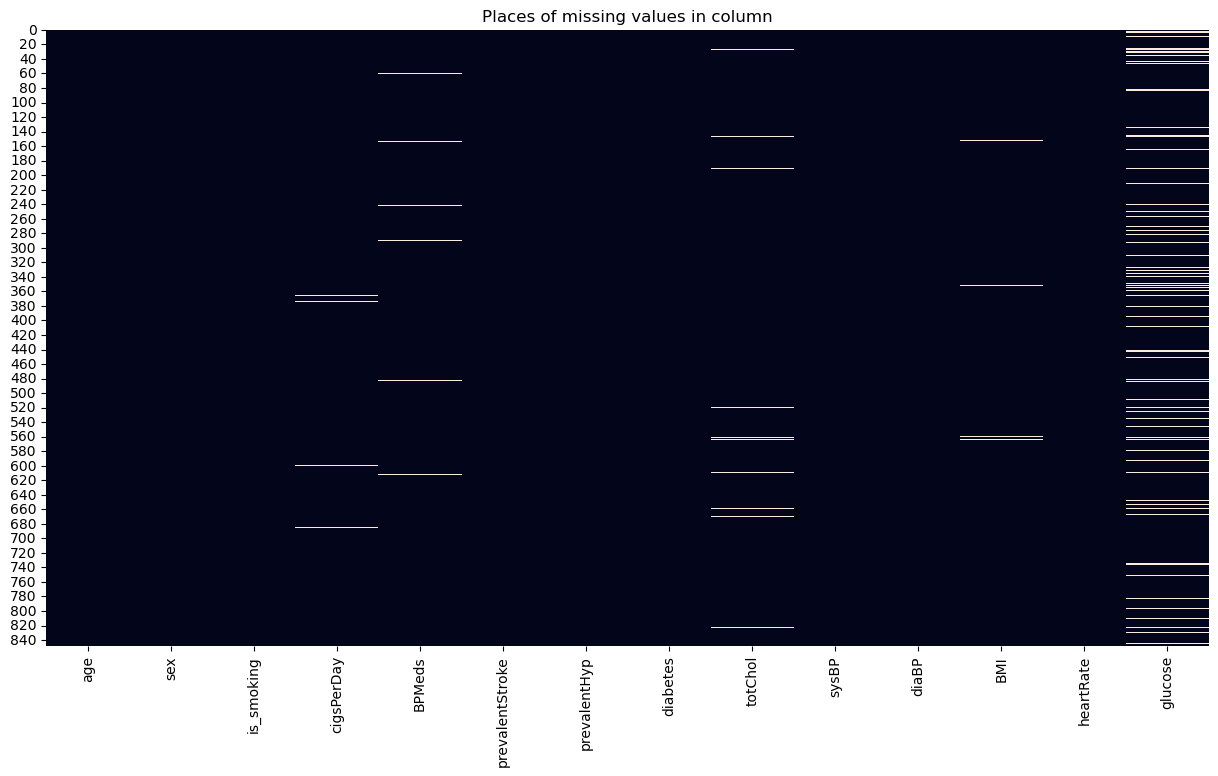

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(df.isnull(), cbar=False, ax=ax)

In [18]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,84,9.905660
totChol,12,1.415094
BPMeds,9,1.061321
cigsPerDay,7,0.825472
BMI,5,0.589623


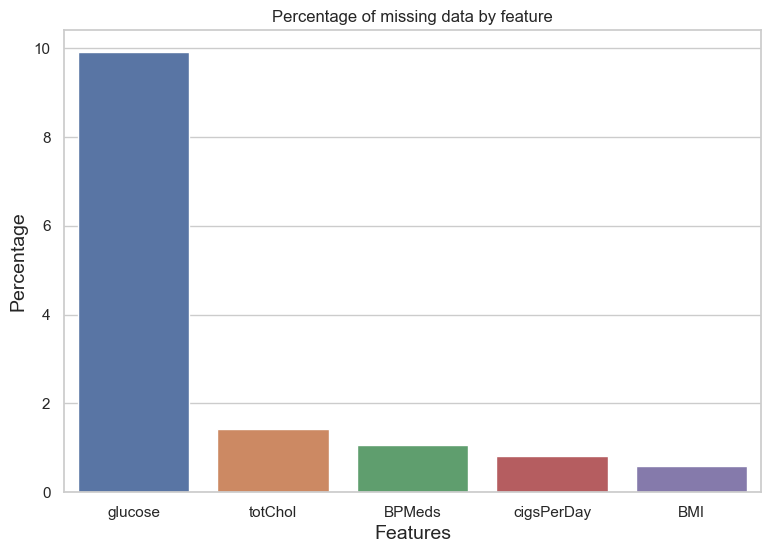

In [19]:
# Visualizing the percentage of missing data
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [20]:
# let's count the all rows which are having missing values 
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
# checking missing value percentage 
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  103
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


At **8.97%**, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

Since the missing entries account for only **11%** of the total data so, we can drop these entries without losing alot of data.

In [21]:
# Excluding the missing values
df.dropna(axis=0,inplace=True)

In [22]:
# Now checking for missing values
df.isnull().any()

age                False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
dtype: bool

In [23]:
# Checking for any duplicate values 
len(df[df.duplicated()])

0

In [24]:
# statistical measures about the data
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,49.810738,0.432215,0.471141,8.710067,0.030872,0.004027,0.299329,0.026846,235.865772,131.455705,82.976510,25.751624,75.248322,81.440268
std,8.466435,0.495717,0.499502,12.052494,0.173088,0.063372,0.458272,0.161741,41.867761,21.136224,11.507877,3.837216,12.037970,22.914626
min,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000,92.000000,55.000000,15.540000,44.000000,40.000000
25%,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,75.000000,23.280000,67.000000,72.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,82.000000,25.370000,75.000000,77.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,260.000000,142.500000,89.000000,28.030000,80.000000,87.000000
max,69.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,405.000000,206.000000,140.000000,43.300000,130.000000,370.000000


The features described in the above data set are:

1. **Count:** tells us the number of NoN-empty rows in a feature.

2. **Mean:** tells us the mean value of that feature.

3. **Std:** tells us the Standard Deviation Value of that feature.

4. **Min:** tells us the minimum value of that feature.

5. **25%, 50%, and 75%:** are the percentile/quartile of each features.

6. **Max:** tells us the maximum value of that feature.

**Data Distribution**

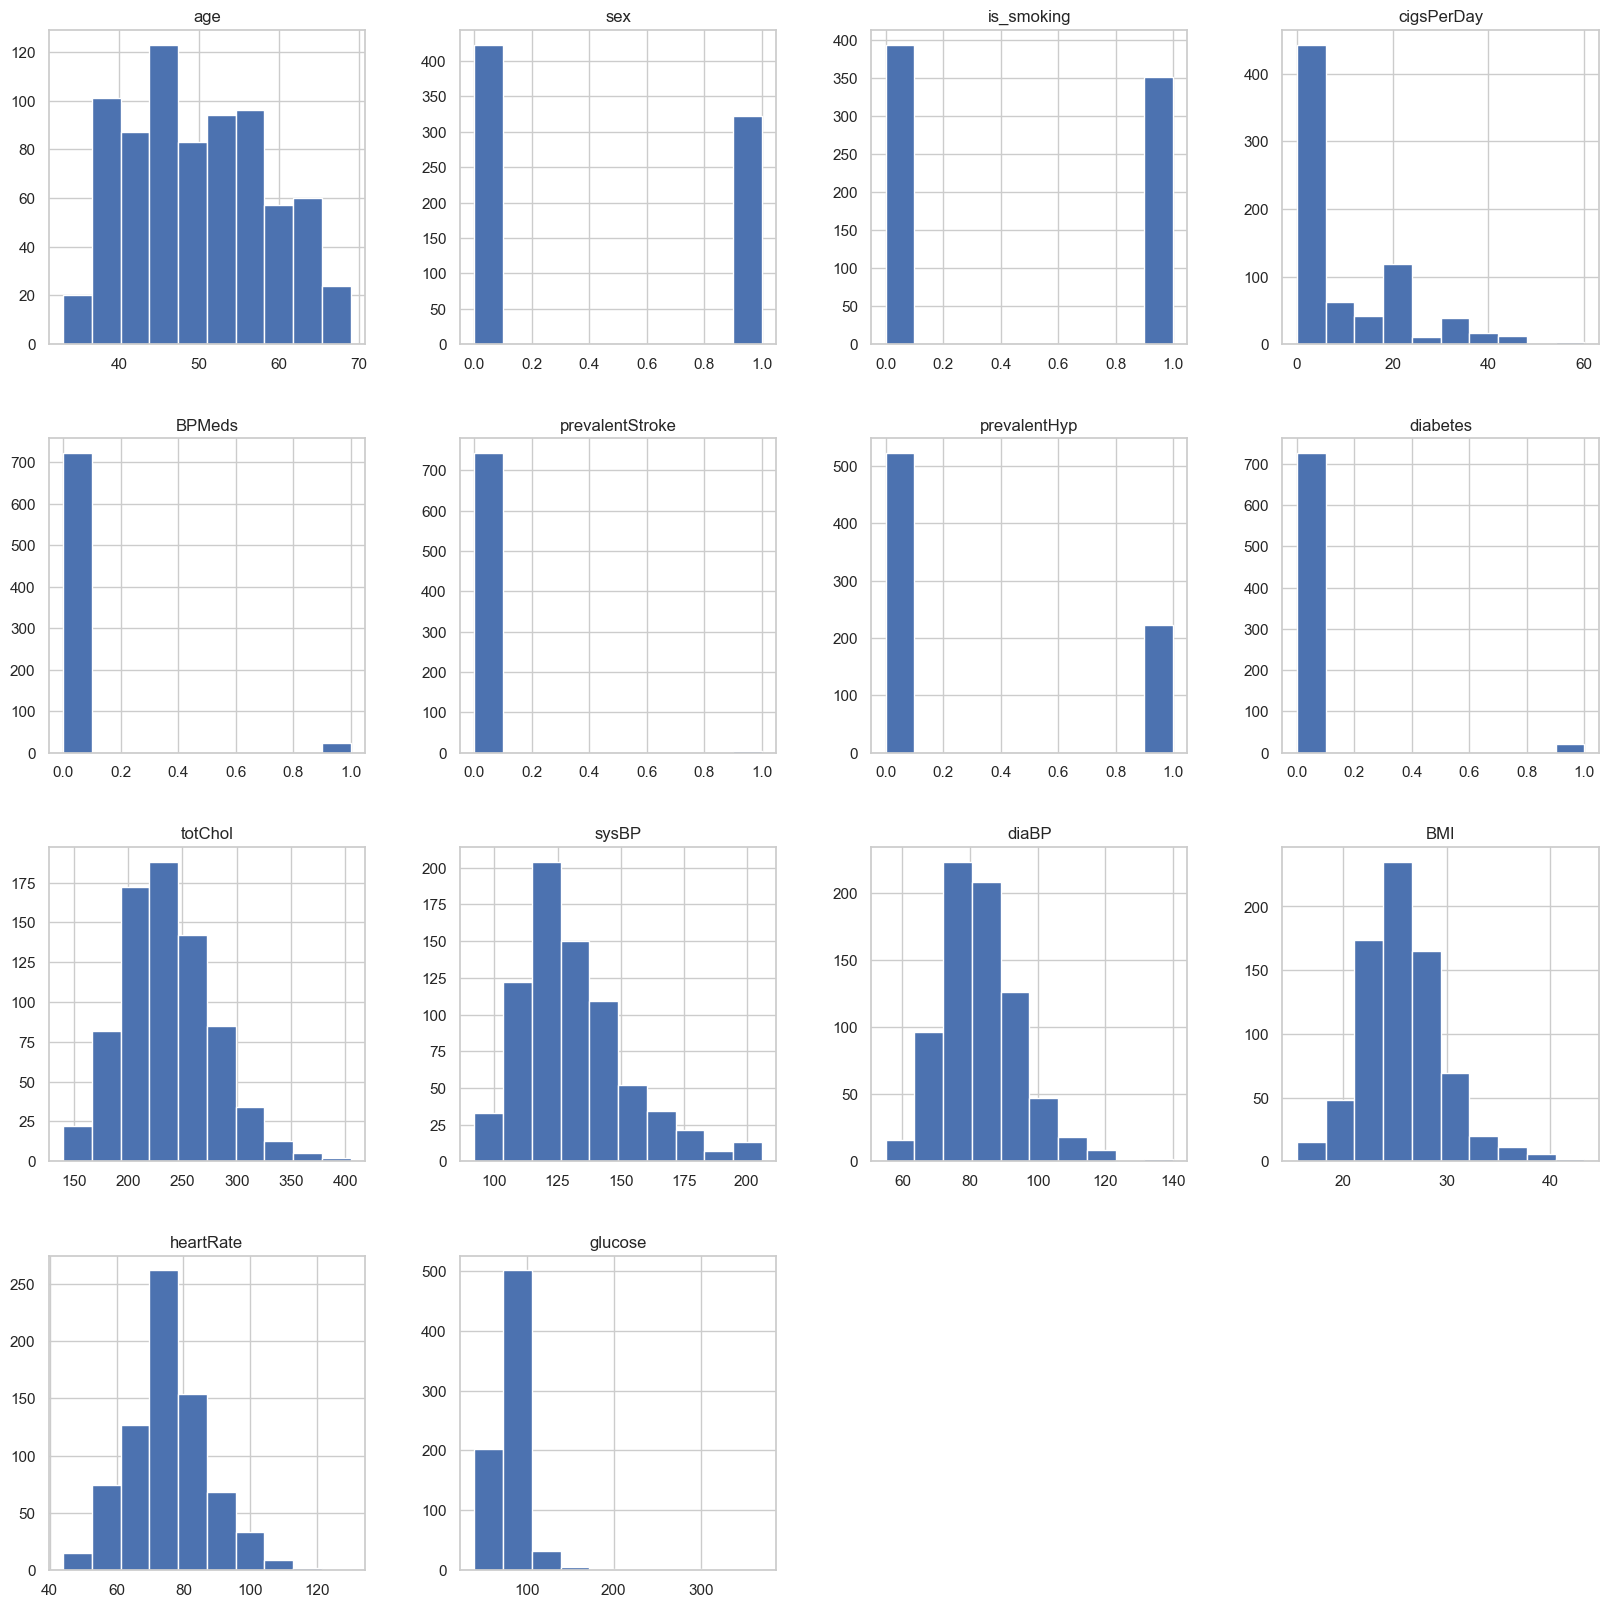

In [25]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

From above distribution plot we can say that the data on the **prevalent stroke**, **diabetes**, and **blood pressure** meds are poorly balanced.

# **Analysing features**

Target Variable Analysis:

In [40]:
df.columns

#df['TenYearCHD'].value_counts()


Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [49]:
# checking the distribution of Target Variable
#df['TenYearCHD'].value_counts()

df.TenYearCHD.value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

There are 2547 patients without heart disease and 572 patients with the disease.

1 --> Person have risk of coronary heart disease

0 --> Person do not have risk of coronary heart disease

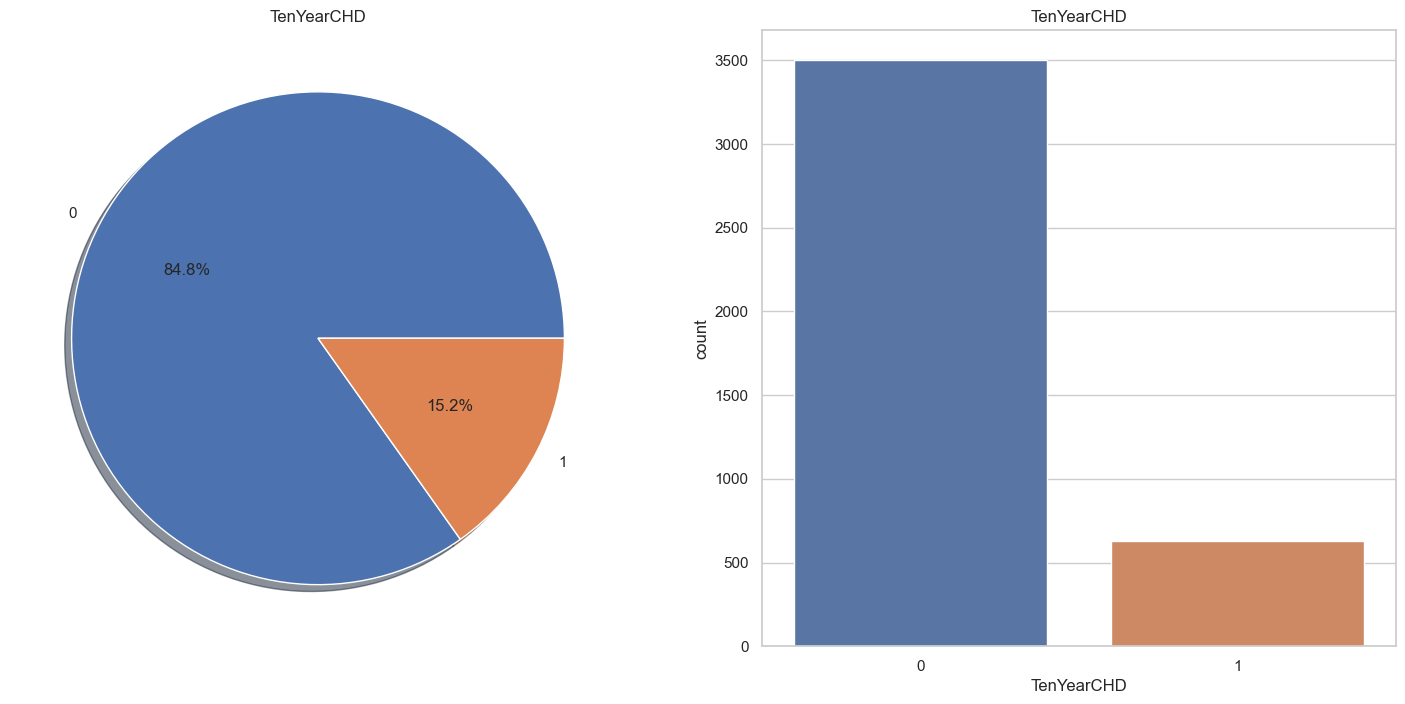

In [54]:
#Plotting pie chart of target variable
# f, 
ax=plt.subplots(1,2,figsize=(18,8))
# df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('TenYearCHD')
# ax[0].set_ylabel('')
# sns.countplot('TenYearCHD',data=df, ax=ax[1])
# ax[1].set_title('TenYearCHD')
# plt.show()

# Plotting pie chart of target variable
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')

# Count plot with corrected syntax
sns.countplot(x='TenYearCHD', data=df, ax=ax[1])  # Use x='TenYearCHD' instead of 'TenYearCHD'
ax[1].set_title('TenYearCHD')

plt.show()

We can see above that we have the imbalanced data set as the number of people without the disease greatly exceeds the number of people with the disease.

Let's look at the number of people with cardiovascular disease exceed the  number of people withhout cardiovascular disease.

<Axes: title={'center': 'Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease'}, xlabel='age', ylabel='count'>

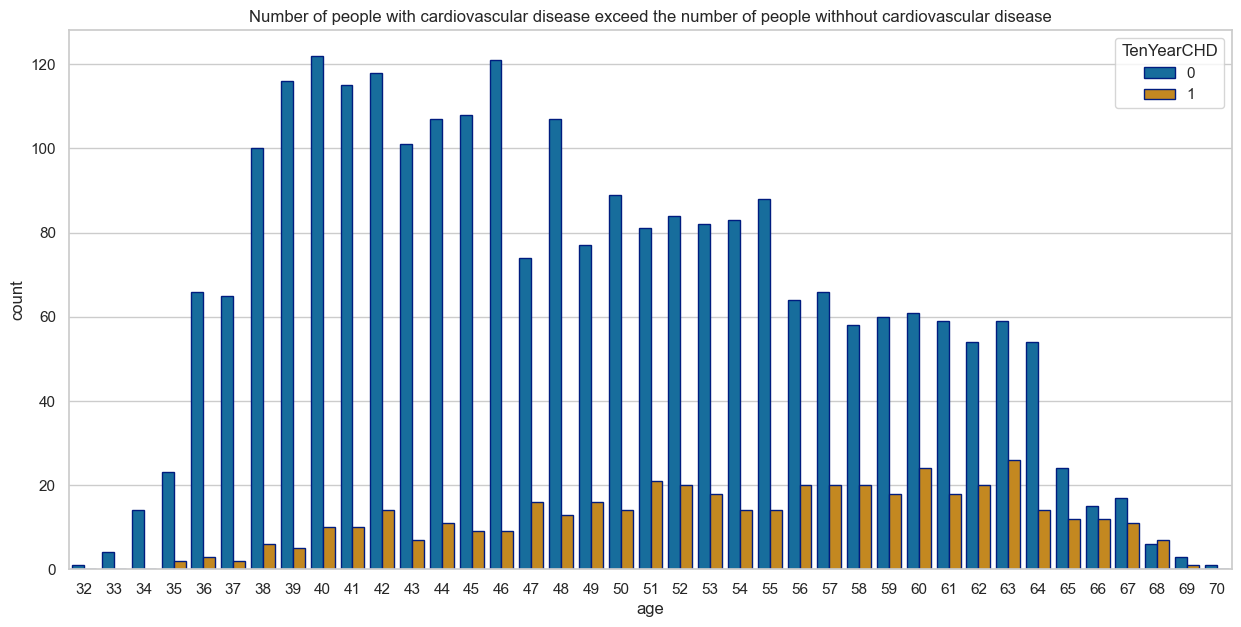

In [27]:
# Visualising the target and age variable
plt.figure(figsize=[15,7])
plt.title("Number of people with cardiovascular disease exceed the number of people withhout cardiovascular disease")
sns.countplot(x='age', hue='TenYearCHD', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

As we can see in above plot The people with the highest risk of developing heart disease are between the ages of **51 and 63.**

Because the number of sick people generally increases with age.

**Categorical variable comparisons:**

Plotting for other categorical variables with respect to target variable

In [28]:
from operator import add
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
  # Function to plot stacked bar chart
    default_colors = ['#006400', '#FF0000', '#228B22']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

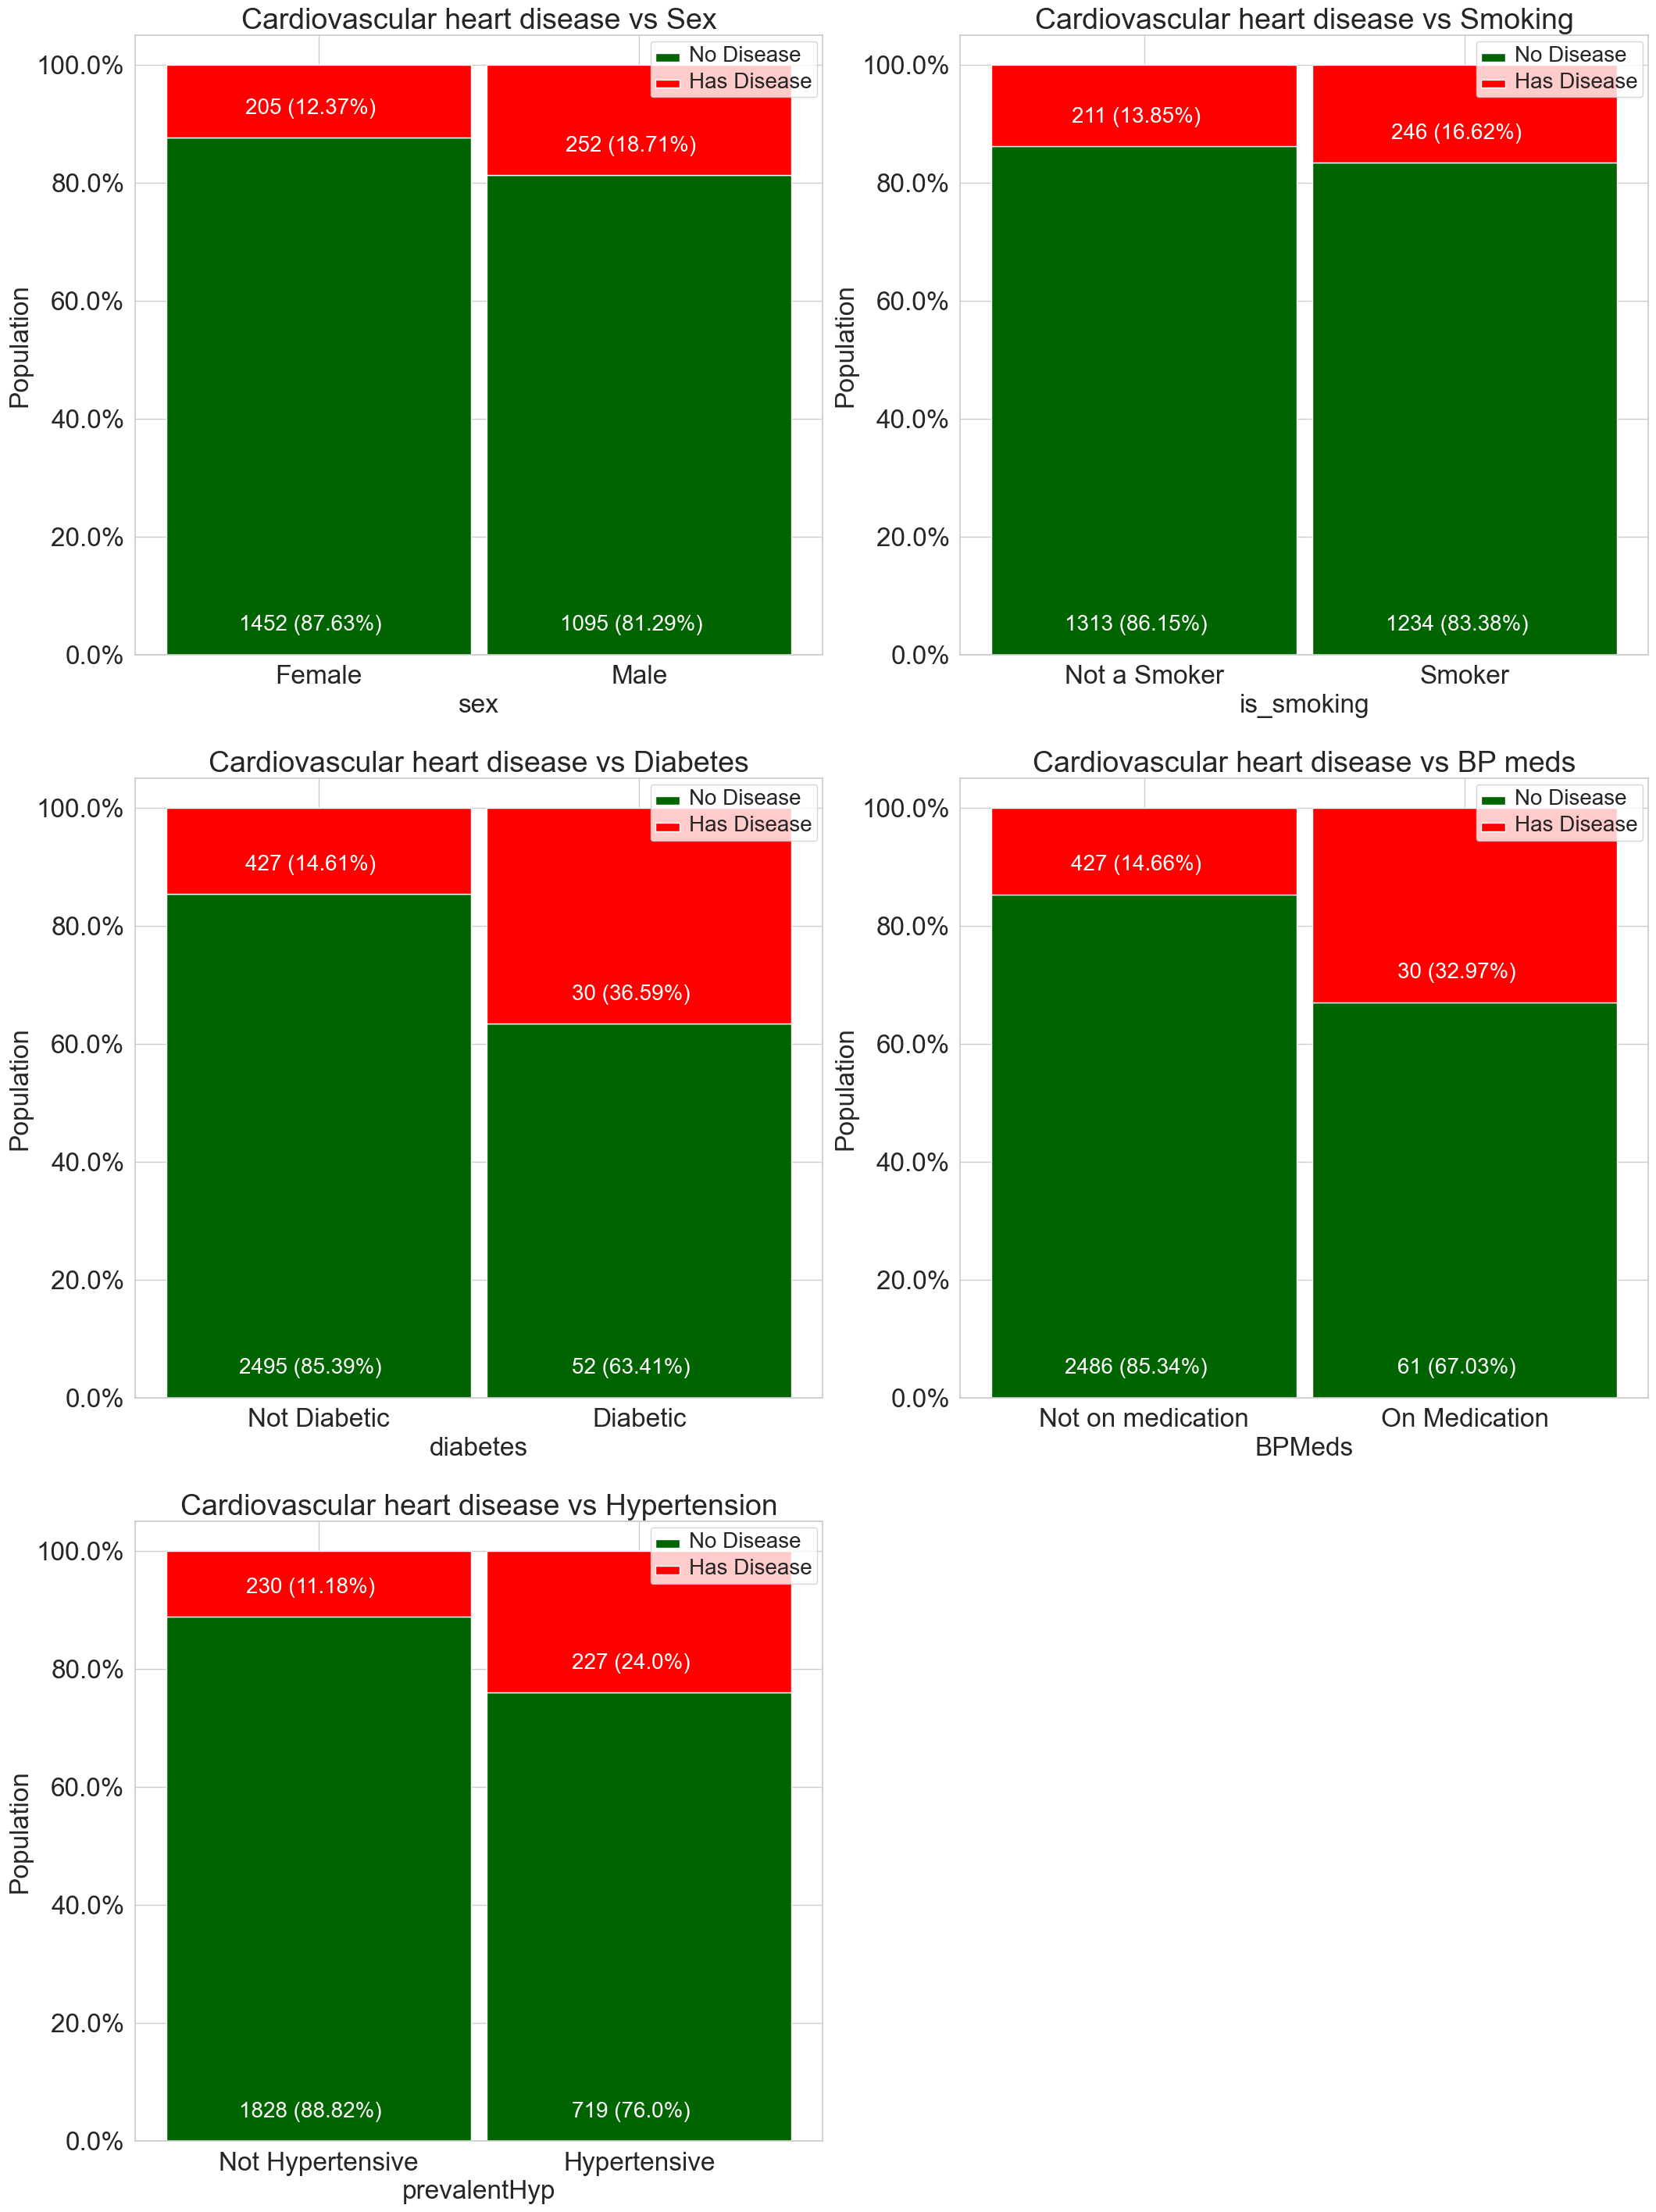

In [29]:
# Visualzing each category with respect to target variable
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#Plot sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','TenYearCHD']].groupby(['sex','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Sex', ylabel = 'Population')

#Plot smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['is_smoking','TenYearCHD']].groupby(['is_smoking','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Smoking', ylabel = 'Population')

#Plot diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Diabetes', ylabel = 'Population')

#Plot BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs BP meds', ylabel = 'Population')

#Plot Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'Cardiovascular heart disease vs Hypertension', ylabel = 'Population')

From the above categorical variables comparison plot we can conclude that,

*   Slightly more males are suffering from Cardiovascular heart disease than females.
*   The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
*   The percentage of people who have Cardiovascular heart disease is higher among the diabetic patients and also those patients with prevalent hypertension have more risk of Cardiovascular heart disease compare to those who don't have hypertensive problem.
*   The percentage of people who are on medication of blood pressure have more risk of Cardiovascular heart disease compare to those who are not on medication.




**Let's see the Correlation between the variables**

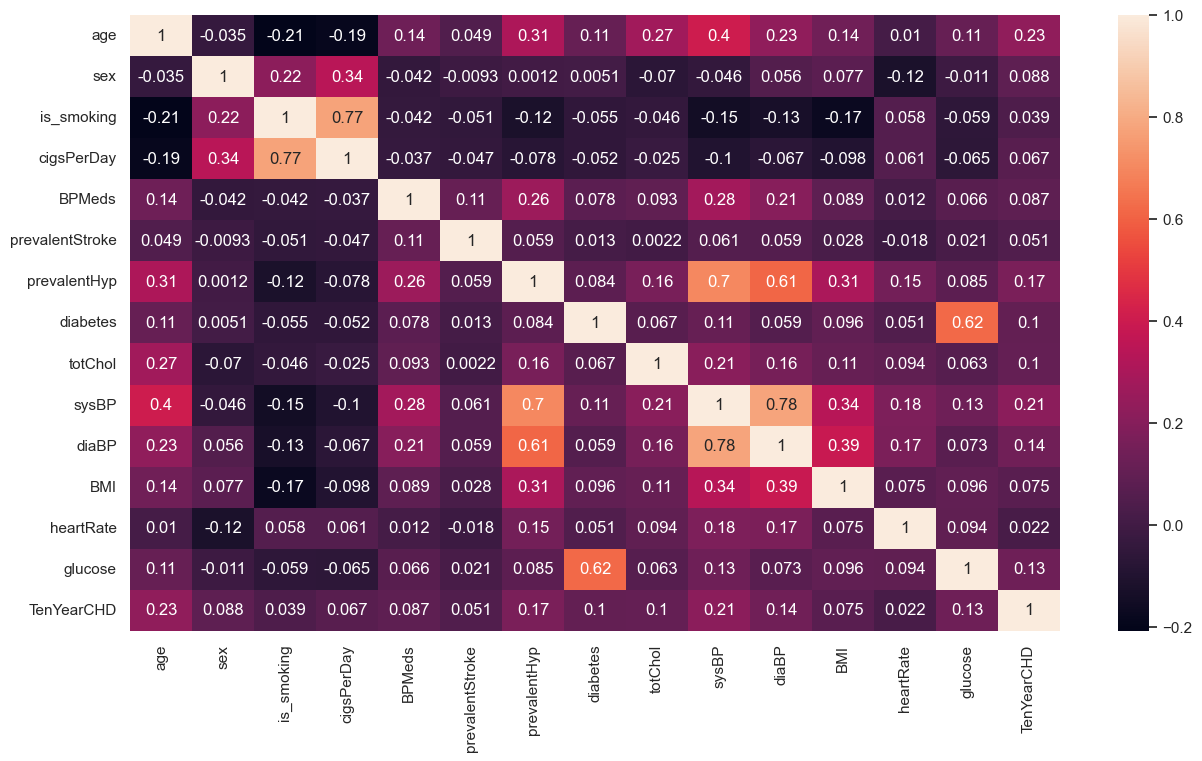

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**From the above correlation plot we can conclude that**,



*   There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

*   Also there are a couple of features that are highly correlated with each other and it makes no sense to use both of them in building a machine learning model. 

**These includes:** 

*  Blood glucose and diabetes;
*  systolic and diastolic blood pressures;
*  cigarette smoking and the number of cigarretes smoked per day. 

Therefore we need to carry out feature selection to pick the best features. 


# **Feature Engineering/Selection**

**Tree-based: SelectFromModel**

**SelectFromModel** is an Embedded method. Embedded methods use algorithms that have built-in feature selection methods.


Here,

We have used RandomForest() to select features based on feature importance.
We calculate feature importance using node impurities in each decision tree. 

In Random forest, the final feature importance is the average of all decision tree feature importance.

In [31]:
#define the features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=14)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')


7 selected features


In [33]:
# Important or top Features
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

The top features are:

1. Age
2. Total cholesterol
3. Systolic blood pressure
4. Diastolic blood pressure
5. BMI
6. Heart rate
7. Blood glucose

**Statistics on the top feature:**



In [34]:
# Importing statsmodels 
import statsmodels.api as sm

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [35]:
# Splitting the dependent and independent variables
top_features = df[embeded_rf_feature]
y = df['TenYearCHD']

In [36]:
# Fit the data
result = sm.Logit(y,top_features).fit()
# The summary table below, gives us a descriptive summary about the regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.415336
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3004
Model:                          Logit   Df Residuals:                     2997
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                 0.02592
Time:                        15:41:12   Log-Likelihood:                -1247.7
converged:                       True   LL-Null:                       -1280.9
Covariance Type:            nonrobust   LLR p-value:                 2.236e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0226      0.006      3.584      0.000       0.010       0.035
totChol       -0.0018      0.

In the output, **Iterations** refer to the number of times the model iterates over the data, trying to optimise the model.

Explanation of some of the terms in the summary table:

* **coef** : the coefficients of the independent variables in the regression equation.
* **Log-Likelihood** : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.
* **LL-Null** : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
* **Pseudo R-squ.** : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

In [37]:
# Checking the odds ratio of top features
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.010284  1.035552    1.022840
totChol    0.995854  1.000481    0.998165
sysBP      1.017473  1.032083    1.024752
diaBP      0.958523  0.983091    0.970729
BMI        0.922652  0.972119    0.947062
heartRate  0.962550  0.978167    0.970327
glucose    1.001974  1.009041    1.005501


From above table we can conclude that the odds of getting cardiovascular heart disease risk increases with about 2% for every increase in age and systolic blood pressure(sysBP).

The other factors show no significant positive odds.

**Pair plots**

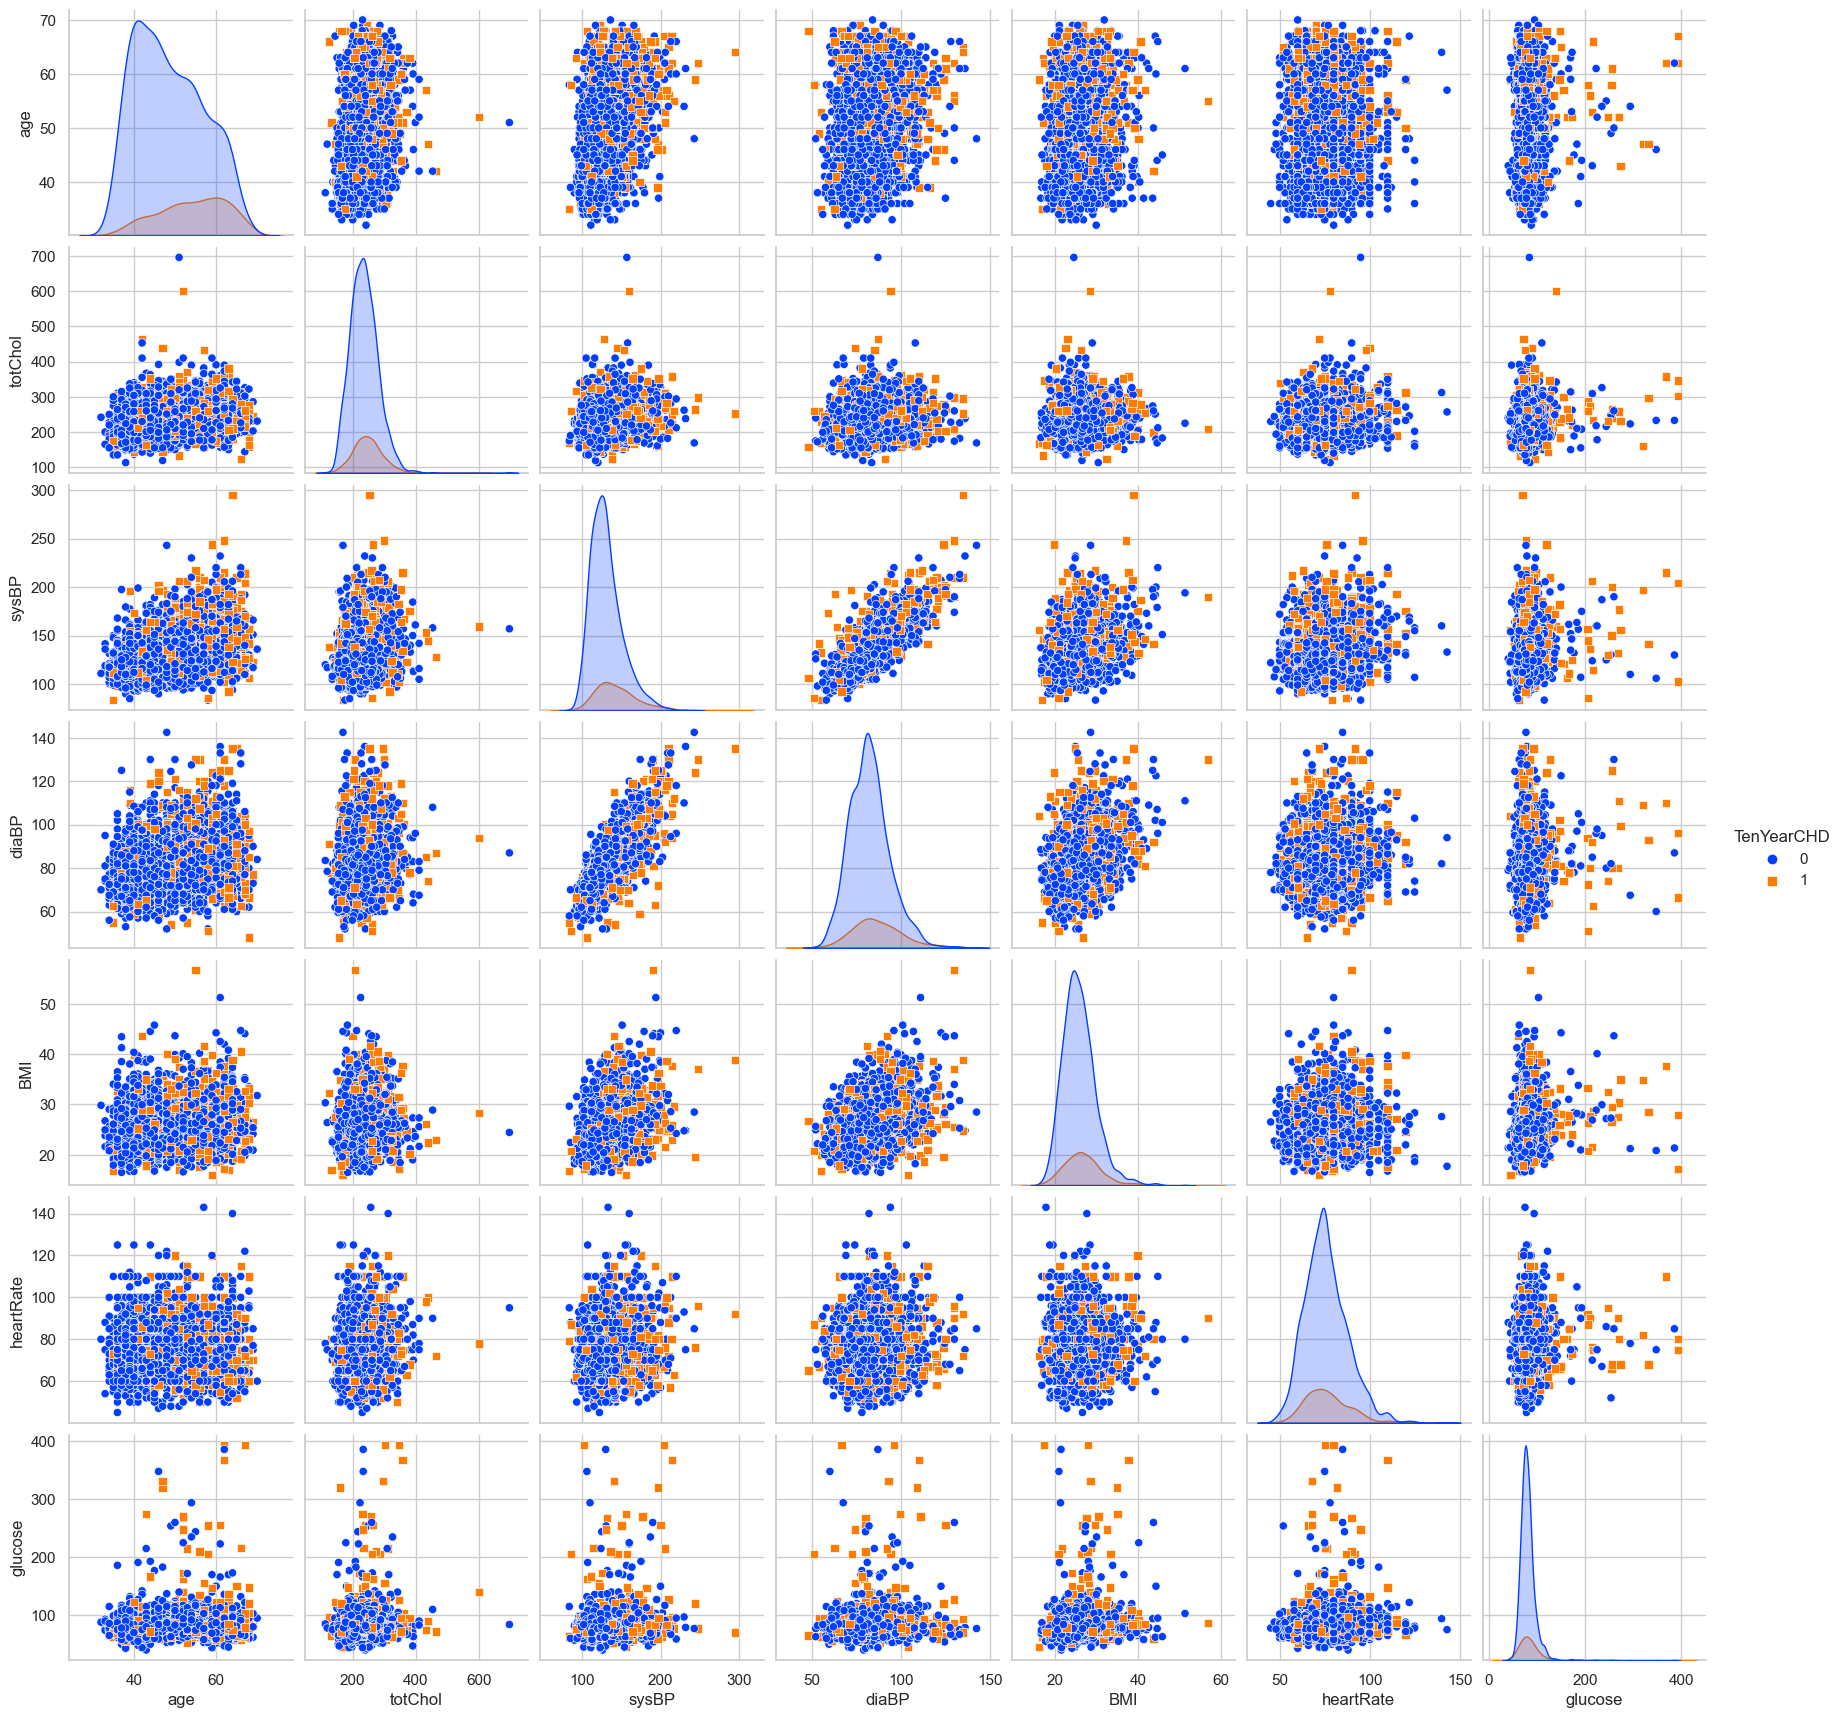

In [38]:
# Plotting pairplot of top features vs target variable
sns.pairplot(df, hue = 'TenYearCHD', markers=["o", "s"], vars = embeded_rf_feature, palette='bright')

# **Modelling and predicting with Machine Learning**

Since our dataset is imbalanced i.e for every positive case there are about 5-6 negative cases. We may end up with a classifier that is biased to the negative cases. The classifier may have a high accuracy but poor a precision and recall. 

To handle this problem we will balance the dataset using the **Synthetic Minority Oversampling Technique (SMOTE).**

**SMOTE** :

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors.

**SMOTE** algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df[embeded_rf_feature]
y = df.iloc[:,-1]
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3004
Resampled dataset shape 5094


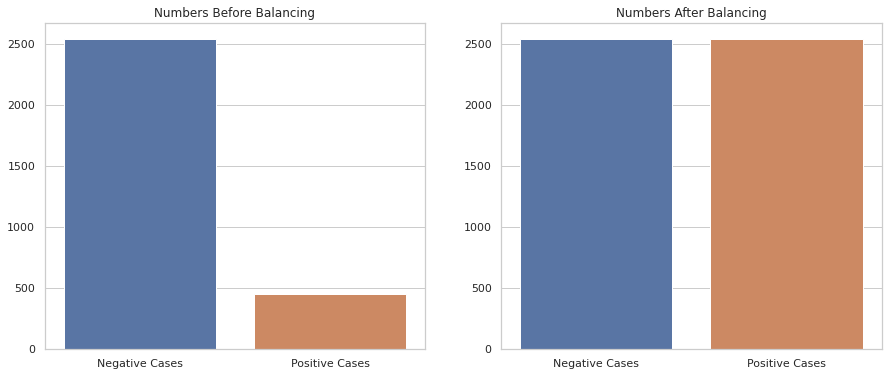

In [ ]:
from collections import Counter
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(dict(Counter(y)).values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(dict(Counter(y_smote)).values()))
plt.title("Numbers After Balancing")
plt.show()

As seen after applying SMOTE, the new dataset is much more balanced.

**Splitting the data to Training and Testing set**

In [ ]:
# First let's create our new dataset
df_new = pd.concat([pd.DataFrame(x_smote), pd.DataFrame(y_smote)], axis=1)
df_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
df_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
X_new = df_new[embeded_rf_feature]
y_new = df_new["TenYearCHD"]

X_train,X_test,Y_train,Y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 4075 records and Testing features have 1019 records.


# **Models:**

The four algorithms that we will be using are:

1. **Logistic Regression**
2. **Random Forrest**
3. **XGBoost**
4. **Support Vector Machine**


Here, we will be using **GridsearchCV** search algorithm for above algorithms

In [ ]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

1. **Logistic Regression**

**Logistic regression** aims to measure the relationship between a categorical dependent variable and one or more independent variables (usually continuous) by plotting the dependent variables' probability scores.

In [ ]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [ ]:
#training the classifier
logistic_clf.fit(X_train,Y_train)

logistic_clf.best_params_

{'C': 0.001, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
#making predictions
logistic_predict = logistic_clf.predict(X_test)

In [ ]:
logistic_accuracy = accuracy_score(Y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(logistic_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 65.16%


In [ ]:
print('Train ROC-AUC score : ', logistic_clf.best_estimator_.score(X_train,Y_train))
print('Test ROC-AUC score : ', logistic_clf.best_estimator_.score(X_test,Y_test))

Train ROC-AUC score :  0.6591411042944785
Test ROC-AUC score :  0.6516192345436702


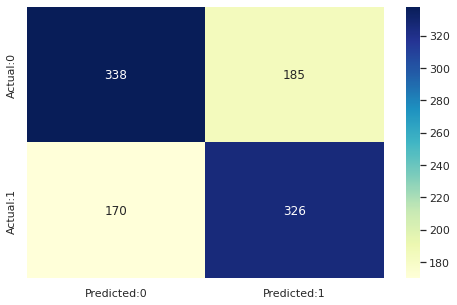

In [ ]:
# confusion matrix of Logistic Model
cm=confusion_matrix(Y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       523
           1       0.64      0.66      0.65       496

    accuracy                           0.65      1019
   macro avg       0.65      0.65      0.65      1019
weighted avg       0.65      0.65      0.65      1019



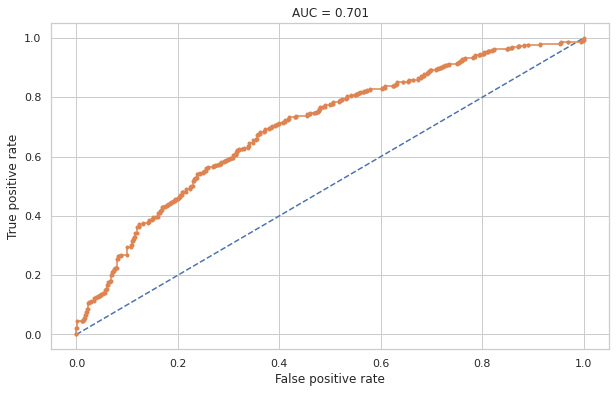

In [ ]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(Y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()


2. **Random Forest**


**Random forests** are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

In [ ]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,cv=10, scoring='roc_auc')

In [ ]:
#training the classifier
random_clf.fit(X_train,Y_train)

random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [ ]:
#making predictions 
random_predict = random_clf.predict(X_test)

In [ ]:
random_accuracy = accuracy_score(Y_test,random_predict)
print(f"Using logistic regression we get an accuracy of {round(random_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 69.97%


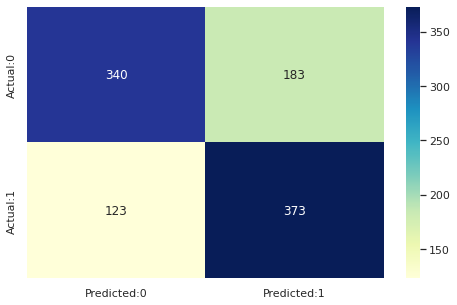

In [ ]:
# confusion matrix of Random Forest
cm=confusion_matrix(Y_test,random_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test,random_predict))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       523
           1       0.67      0.75      0.71       496

    accuracy                           0.70      1019
   macro avg       0.70      0.70      0.70      1019
weighted avg       0.70      0.70      0.70      1019



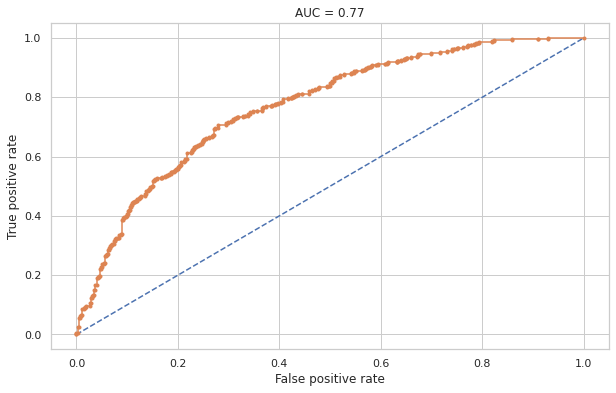

In [ ]:
# ROC curve and AUC 
probs1 = random_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
ran_auc = roc_auc_score(Y_test, probs1)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs1)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(ran_auc,3)}")
plt.show()

3. **XGBoost**

**XGBoost** stands for eXtreme Gradient Boosting. The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms

In [ ]:
params_xgb = {
    'max_depth': range (2, 12, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

xgb_clf = GridSearchCV(XGBClassifier(), param_grid = params_xgb, cv = 10, scoring='roc_auc')
                      

In [ ]:
#training the classifier
xgb_clf.fit(X_train,Y_train)

xgb_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 200}

In [ ]:
#making predictions 
xgb_predict = xgb_clf.predict(X_test)

In [ ]:
xgb_accuracy = accuracy_score(Y_test,xgb_predict)
print(f"Using XG boost we get an accuracy of {round(xgb_accuracy*100,2)}%")

Using XG boost we get an accuracy of 89.79%


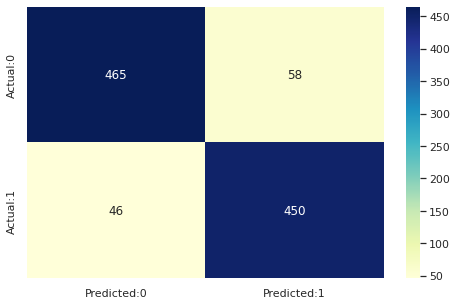

In [ ]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(Y_test,xgb_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       523
           1       0.89      0.91      0.90       496

    accuracy                           0.90      1019
   macro avg       0.90      0.90      0.90      1019
weighted avg       0.90      0.90      0.90      1019



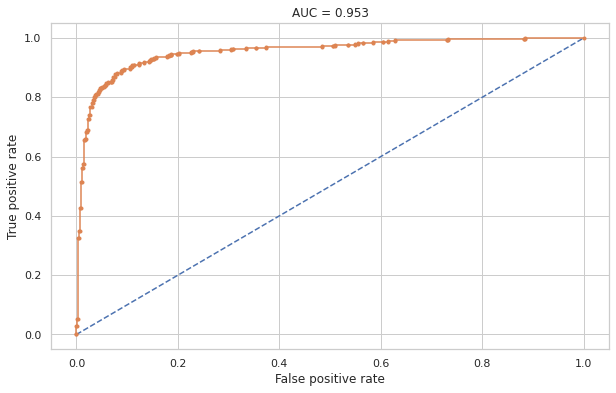

In [ ]:
# ROC curve and AUC 
probs2 = xgb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
xgb_auc = roc_auc_score(Y_test, probs2)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs2)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_auc,3)}")
plt.show()

4. **Support Vector Machine**

**Support vector machines (SVMs)** are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used in classification problems.

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

In [ ]:
# Grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [ ]:
#training the classifier
svm_clf.fit(X_train,Y_train)

svm_clf.best_params_

{'C': 10, 'gamma': 0.01}

In [ ]:
#making predictions 
svm_predict = svm_clf.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(Y_test,svm_predict)
print(f"Using Support Vector Machine we get an accuracy of {round(svm_accuracy*100,2)}%")

Using Support Vector Machine we get an accuracy of 92.35%


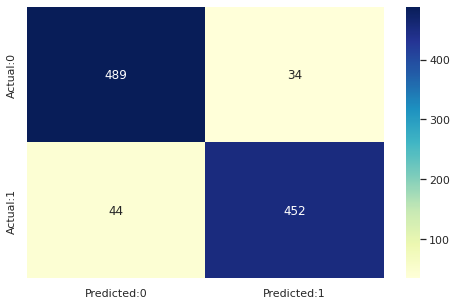

In [ ]:
# confusion matrix of XG boost Classifier
cm=confusion_matrix(Y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(Y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       523
           1       0.93      0.91      0.92       496

    accuracy                           0.92      1019
   macro avg       0.92      0.92      0.92      1019
weighted avg       0.92      0.92      0.92      1019



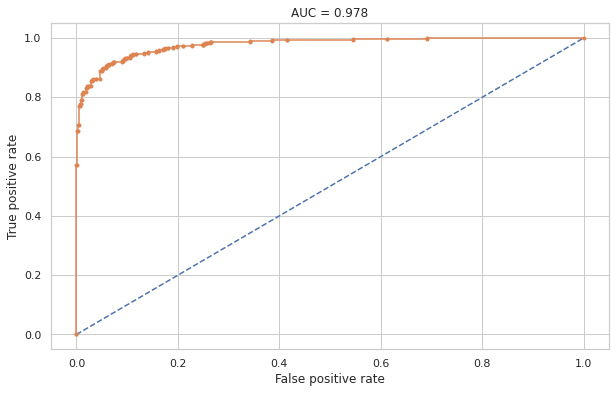

In [ ]:
# ROC curve and AUC 
probs3 = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs3 = probs3[:, 1]
# calculate AUC
svc_auc = roc_auc_score(Y_test, probs3)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs3)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svc_auc,3)}")
plt.show()

**Lets collect all our best models**

In [ ]:
# Creating dataframe which shows the performance metrics of each model
Performance_df = pd.DataFrame({
    "Logistic regression":{'Test Accuracy':logistic_accuracy.round(2),'Precision': precision_score(Y_test, logistic_predict).round(2),'Recall': recall_score(Y_test, logistic_predict).round(2),'F1 Score': f1_score(Y_test, logistic_predict).round(2), 'AUC':log_auc.round(2)},
    "Random Forest":{'Test Accuracy':random_accuracy.round(2),'Precision': precision_score(Y_test, random_predict).round(2),'Recall': recall_score(Y_test, random_predict).round(2),'F1 Score': f1_score(Y_test, random_predict).round(2), 'AUC':ran_auc.round(2)},
    "XG Boost":{'Test Accuracy':xgb_accuracy.round(2),'Precision': precision_score(Y_test, xgb_predict).round(2),'Recall': recall_score(Y_test, xgb_predict).round(2),'F1 Score': f1_score(Y_test, xgb_predict).round(2), 'AUC':xgb_auc.round(2)},
    "Support vector machine":{'Test Accuracy':svm_accuracy.round(2),'Precision': precision_score(Y_test, svm_predict).round(2),'Recall': recall_score(Y_test, svm_predict).round(2),'F1 Score': f1_score(Y_test, svm_predict).round(2), 'AUC':svc_auc.round(2)}
}).T

In [ ]:
Performance_df

,Test Accuracy,Precision,Recall,F1 Score,AUC
Logistic regression,0.65,0.64,0.66,0.65,0.70
Random Forest,0.70,0.67,0.75,0.71,0.77
XG Boost,0.90,0.89,0.91,0.90,0.95
Support vector machine,0.92,0.93,0.91,0.92,0.98


Observation from above table:
* **XG Boost**, **Support vector machine** gives highest Accuracy, Recall, Precision and AUC score.
* Highest recall is given by **Support vector machine**
* Highest AUC is given by **Support vector machine**

Overall we can say that **Support vector machine** is the best model that can be used for the risk prediction of Cardiovasular heart disease.

**Let's Plot the Accuracy and AUC score graph of each algorithm**

Accuracy Score plot

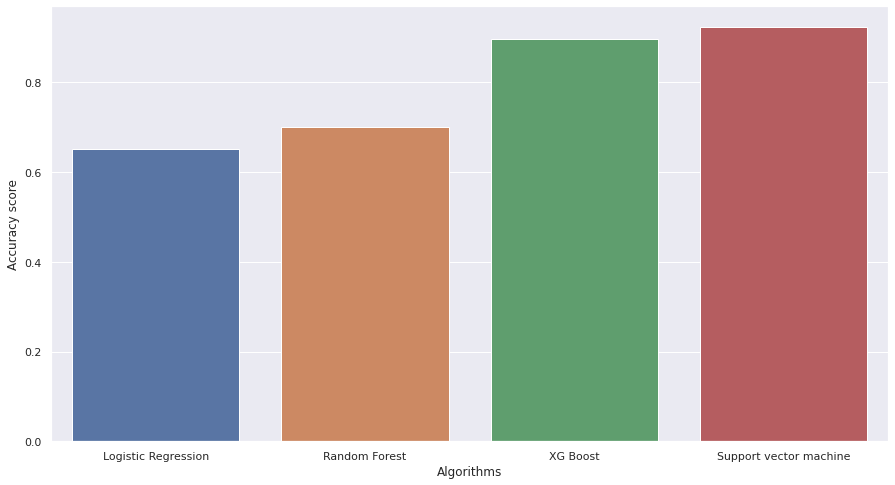

In [ ]:
# Storing accuracies of each algorithm in a list
scores = [logistic_accuracy,random_accuracy,xgb_accuracy,svm_accuracy]
# Naming the algorithms and storing in a list
algorithms = ["Logistic Regression","Random Forest","XG Boost","Support vector machine"] 
# Visualize the algorithms
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

AUC Score plot

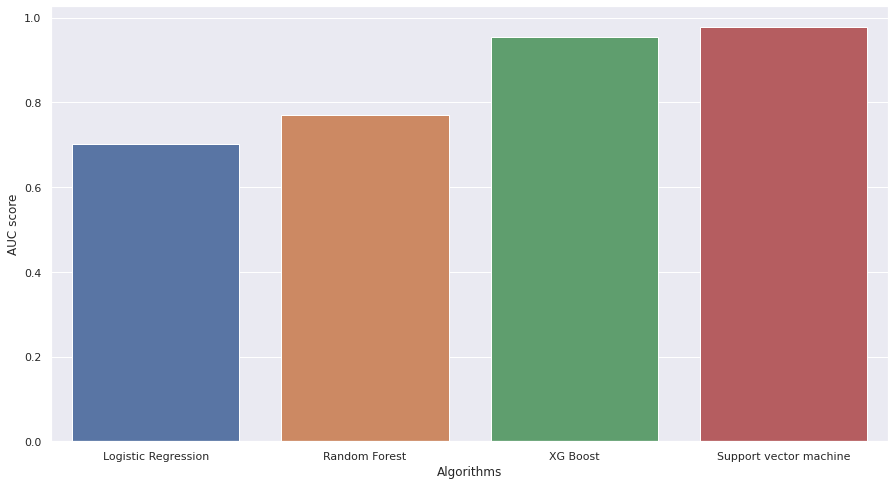

In [ ]:
# Storing AUC score of each algorithm in a list
auc_scores = [log_auc,ran_auc,xgb_auc,svc_auc]
# Naming the algorithms and storing in a list
algorithms = ["Logistic Regression","Random Forest","XG Boost","Support vector machine"] 
# Visualize the algorithms
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("AUC score")
sns.barplot(algorithms,auc_scores)

From both the graphs we can say that the best performing model is **Support Vector Machine** algorithm.

# **Conclusion:**
* The people who have Cardiovascular heart disease is almost equal between smokers and non smokers.
* The top features in predicting the ten year risk of developing Cardiovasular Heart Disease are **'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'**.
* The Support vector machine with the radial kernel is the best performing model in terms of accuracy and the F1 score and Its high AUC-score shows that it has a high true positive rate.
* Balancing the dataset by using the SMOTE technique helped in improving the models' sensitivity.
* With more data(especially that of the minority class) better models can be built.
